In [1]:
import os
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import PlotTools.plot_tools as PTs
from matplotlib.pyplot import rcParams
%matplotlib inline
rcParams['figure.figsize'] = (15.,20)

In [40]:
LU_tag='_ECOSSElayers_CultAR'
LU_tag='_CultAR'
############################
SOIL_DIR='/users/eow/edwcom/GREENHOUSE/SOIL_PROPERTIES/'
# Data
Data_Dir=SOIL_DIR+'datasets/'
COMP_file=Data_Dir+'Merged_Soil_WeightedComposition_CHESSgrid'+LU_tag+'.nc'
#BC_file=Data_Dir+'Merged_Soil_Weighted'+AGR_tag+'BCproperties_CHESSgrid'+LU_tag+'.nc'
#VG_file=Data_Dir+'Merged_Soil_Weighted'+AGR_tag+'VGproperties_CHESSgrid'+LU_tag+'.nc'

CHESS_landcover_file='/users/eow/edwcom/CHESS/chess_landcover_2000.nc'
############################
# Output
plot_DIR=SOIL_DIR+'plots/COMPOSITION/'
if len(LU_tag)>1:
    plot_DIR+=LU_tag[1:]

os.system('mkdir -p '+plot_DIR)


0

In [41]:
fill_value=-9999.
#Soil_Layer_Thick=np.array([0.1,0.25,0.65,2.0])   #(metres)
#Soil_Layer_Depth=np.array([0.1,0.35,1.0,3.0]) #(metres)
#nSD=len(Soil_Layer_Thick)


In [61]:
#COMP_file='/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/Merged_Soil_WeightedComposition_CHESSgrid.nc'
COMP_file='/prj/GREENHOUSE/SOIL_PROPERTIES/datasets/Merged_Soil_WeightedComposition_CHESSgrid_ECOSSElayers.nc'

In [62]:
# Open and Read Composition File
COMP_Dict={}
COMPinf=nc.Dataset(COMP_file,'r')

for var in COMPinf.variables:
    if var not in ['x','y','z']:
        COMP_Dict[var]=COMPinf.variables[var][:]

Soil_Layer_Depth=COMPinf.variables['z'][:]

COMPinf.close()


In [63]:
print(COMP_Dict.keys())

nSD=len(Soil_Layer_Depth)
print(nSD)


dict_keys(['ph', 'silt', 'Bulk_Density', 'sand', 'clay', 'org_carb'])
60


In [64]:
#read in latlon/xy data from chess_landcover
LLinf=nc.Dataset(CHESS_landcover_file,'r')
lats=LLinf.variables['lat'][:]
lons=LLinf.variables['lon'][:]
landcover=LLinf.variables['frac'][:]
LLinf.close()
#LAND_MASK=landcover.mask[0,:]

In [65]:
#help(plt.colorbar)


7 9


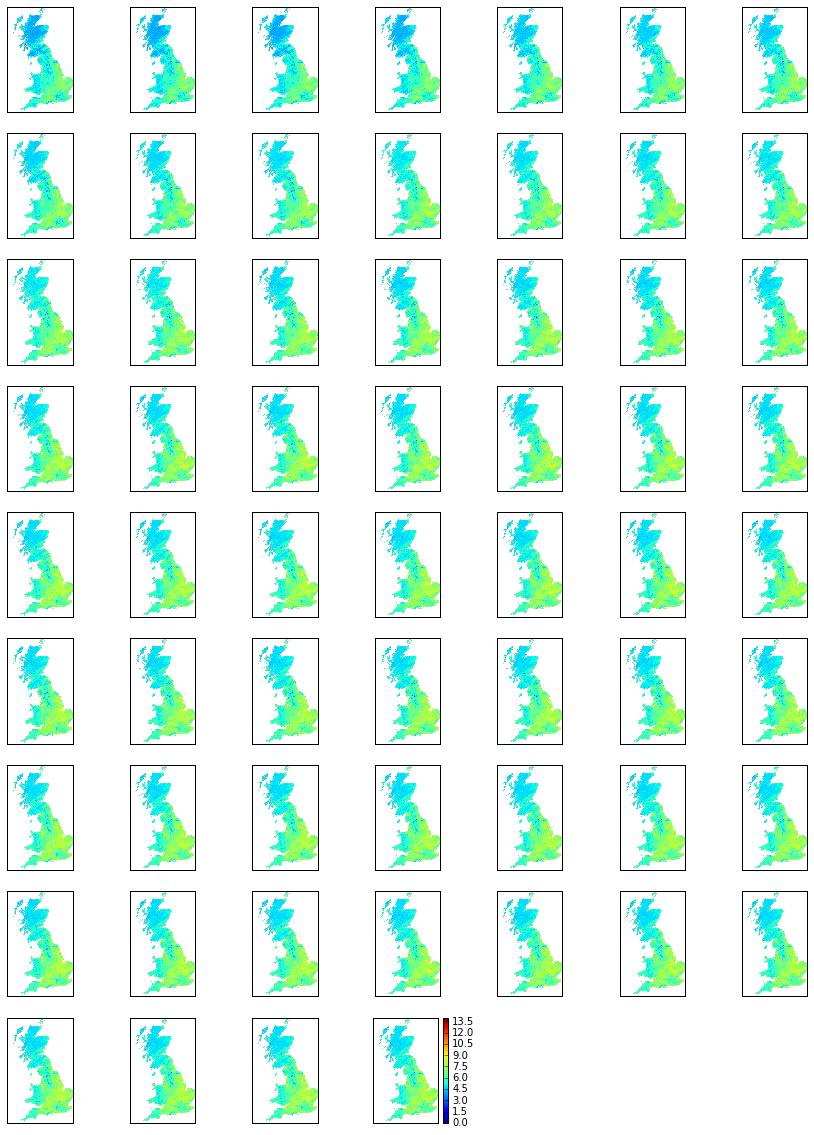

In [66]:
param='ph'
ncols=int(np.floor(nSD**0.5))
nrows=int(np.ceil(nSD/ncols))
vmin,vmax=0,14
print(ncols,nrows)
for iSD in range(nSD):
    plt.subplot(nrows,ncols,iSD+1)
    im=plt.imshow(COMP_Dict[param][iSD,:],origin='bottom',vmin=vmin,vmax=vmax)
    plt.xticks([])
    plt.yticks([])
    #plt.colorbar()

plt.colorbar(im)
plt.show()

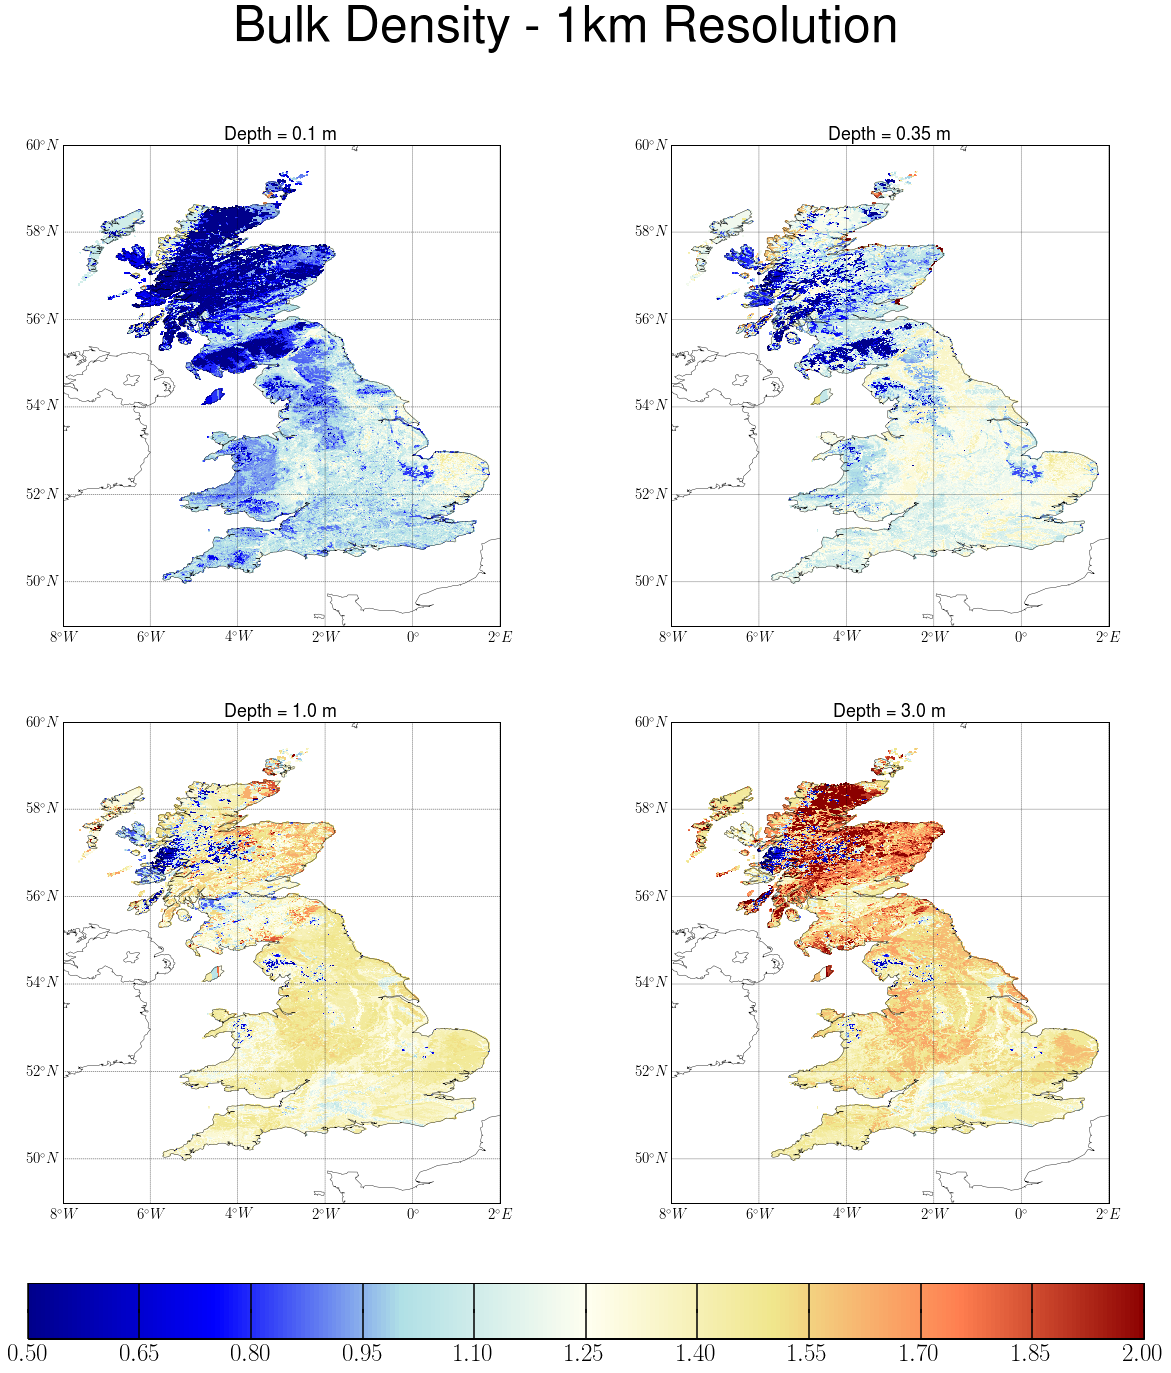

In [20]:
param='Bulk_Density'
plot_titles=['Depth = '+str(depth)+' m' for depth in Soil_Layer_Depth]
plot_DATALIST=[COMP_Dict[param][iSD,:] for iSD in range(nSD)]
plot_LATSLIST=[lats for iSD in range(nSD)]
plot_LONSLIST=[lons for iSD in range(nSD)]
data_range=[0.5,2.]
COLOURS=['darkblue','blue','powderblue','ivory','khaki','coral','darkred']

PTs.plot_map_multi(plot_DATALIST,plot_LONSLIST,plot_LATSLIST,\
                   Ncols=2,Nrows=2, FIGSIZE=(20,24), \
                   COMMON_CBAR=True, \
                   RESOLUTION='i', SUPTITLE=param.replace('_',' ')+' - 1km Resolution' , \
                   INTERPOLATE_COLOURS=True, COLOURS=COLOURS,NLEVELS=250,\
                   LATDEL=2,LONDEL=2, LON_RANGE=[-8,2], \
                   DATA_RANGE=data_range, \
                   FONTSIZES=[15,15,18,18], \
                   PLOT_TITLES=plot_titles, \
                  )



In [17]:
COLOURS=['darkblue','blue','powderblue','ivory','khaki','coral','darkred']